In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

## 1 )

### a )

In [2]:
clustering_df : pd.DataFrame = pd.read_csv(f"{project_root}/TP04/data/raw/clustering.csv").drop(columns=['index'])
clustering_df.info()
clustering_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4999 non-null   int64
 1   B       4999 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


,A,B
0,812954,643720
1,868217,609046
2,920248,607272
3,841621,639394
4,843907,598777


In [3]:
X : np.ndarray = clustering_df.to_numpy()
X_stardardized : np.ndarray = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)

In [4]:
# clustering_normalized_df : pd.DataFrame = clustering_df / clustering_df.max()
# clustering_normalized_df.info()
# clustering_normalized_df.head()
# clustering_normalized_df.to_csv(f"{project_root}/TP04/data/processed/clustering_normalized.csv")

In [5]:
k_means_01 : models.KMeans = models.KMeans(X_stardardized, 15)
k_means_01.fit_centroids(print_iterations=True, runs=20)
print("")
print("CENTROIDES")
for c, i in zip(k_means_01.mu, range(1, len(k_means_01.mu) + 1)):
    print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

K-MEANS: done at iteration  20
K-MEANS: done at iteration  15
K-MEANS: done at iteration  6
K-MEANS: done at iteration  23
K-MEANS: done at iteration  24
K-MEANS: done at iteration  20
K-MEANS: done at iteration  24
K-MEANS: done at iteration  26
K-MEANS: done at iteration  18
K-MEANS: done at iteration  12
K-MEANS: done at iteration  15
K-MEANS: done at iteration  26
K-MEANS: done at iteration  28
K-MEANS: done at iteration  25
K-MEANS: done at iteration  24
K-MEANS: done at iteration  8
K-MEANS: done at iteration  19
K-MEANS: done at iteration  25
K-MEANS: done at iteration  25
K-MEANS: done at iteration  28

CENTROIDES
Cluster = 01 | A: -0.7027172997661026, B: -0.3603779321173058
Cluster = 02 | A: -1.6899329482704162, B: -1.0171798878409533
Cluster = 03 | A: 1.2800283487781654, B: -1.0370874169871522
Cluster = 04 | A: 0.6934192689758223, B: -1.3959225034424045
Cluster = 05 | A: 0.4893056147873357, B: 1.025010267804665
Cluster = 06 | A: -1.2079399779397018, B: 1.121550931972098
Clust

In [6]:
print("DISTANCE SQUARED: ", k_means_01.calculate_distance_squared_error())

DISTANCE SQUARED:  257.6507022197903


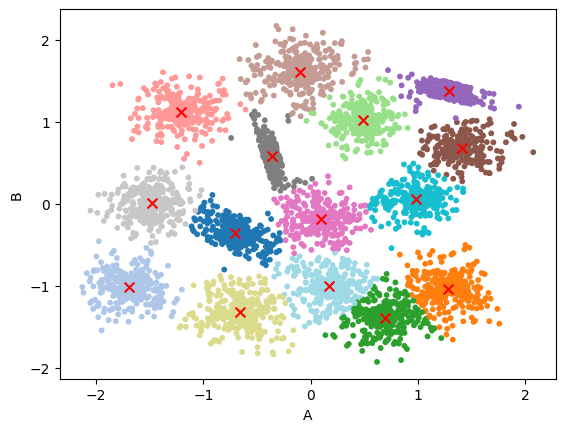

In [7]:
k_means_01.plot_clusters_2d()

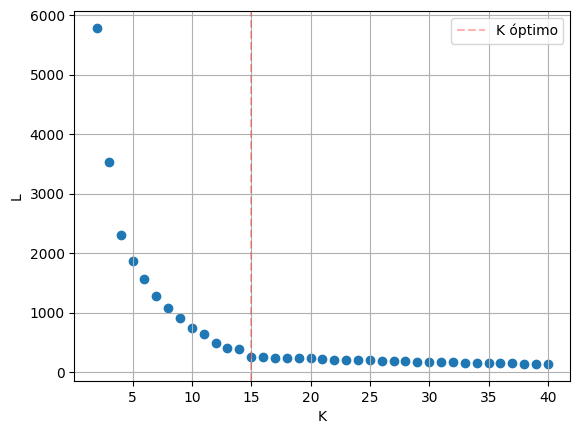

In [8]:
k_max : int = 40
k_model : models.KMeans
losses_k : list[float] = []
valores_k : list[int] = list(range(2, k_max+1))
for k in range(2, k_max + 1):
    k_model = models.KMeans(X_stardardized, k)
    k_model.fit_centroids(runs=5)
    losses_k.append(k_model.calculate_distance_squared_error())
plt.scatter(range(2, k_max+1), losses_k)
plt.xlabel("K")
plt.ylabel("L")
plt.axvline(15, color='red', alpha=0.3, label='K óptimo', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

### b )

In [9]:
gmm_model : models.GMM = models.GMM(X_stardardized, 15)
gmm_model.fit_gaussians(use_k_means_centroids=True, max_iterations=10000, runs=5, print_iterations=True);
# print("\nCENTROIDES")
# for c, i in zip(mu, range(1, len(mu) + 1)):
#     print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

GMM: done at iteration 497
GMM: done at iteration 360
GMM: done at iteration 289
GMM: done at iteration 497
GMM: done at iteration 216


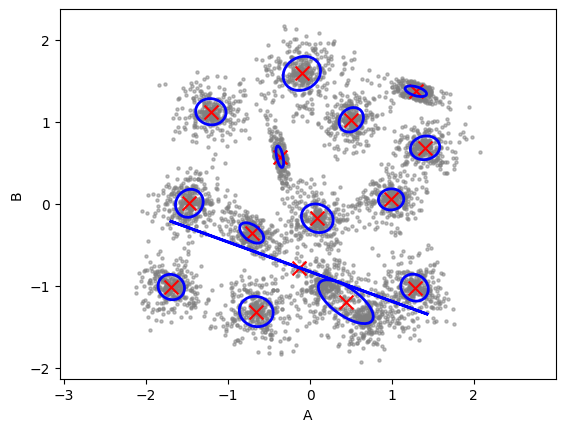

In [10]:
gmm_model.plot_gmm()

In [11]:
print("LOG LIKELIHOOD: ", gmm_model.log_likelihood())

LOG LIKELIHOOD:  -8715.459146690675


### c )

In [12]:
dbscan_model : models.DBScan = models.DBScan(X_stardardized)
dbscan_model.fit_labels(epsilon=0.07, min_points=10, print_iterations=True);

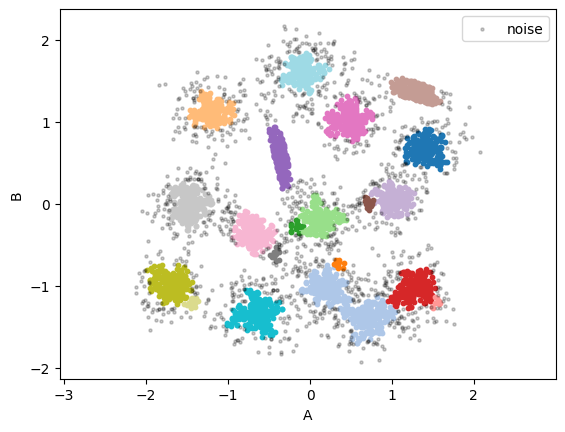

In [13]:
dbscan_model.plot_dbscan()

In [14]:
print("Cantidad de clústers: ", len(set(dbscan_model.labels.values())))

Cantidad de clústers:  21


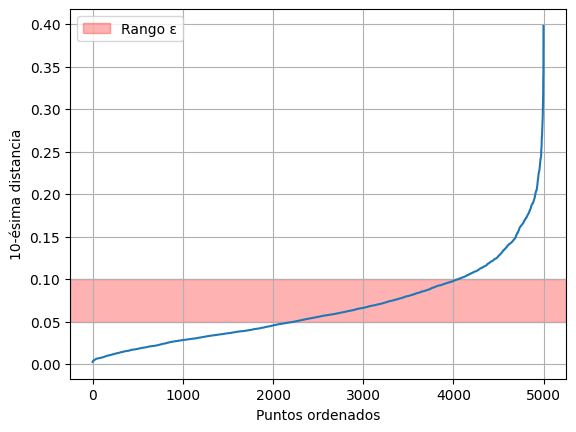

In [15]:
dbscan_model.plot_k_distance(10)

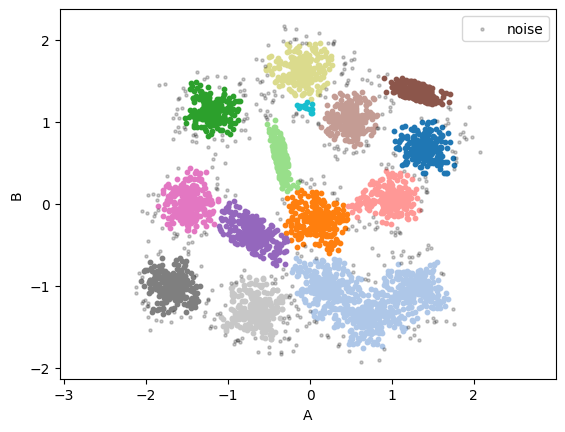

In [16]:
dbscan_model.fit_labels(epsilon=0.1, min_points=10, print_iterations=True);
dbscan_model.plot_dbscan()

In [17]:
print("Cantidad de clústers: ", len(set(dbscan_model.labels.values())))

Cantidad de clústers:  15
